In [814]:
#Dependcies 

from sklearn import *
from sklearn.model_selection import GroupKFold
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import statsmodels.api as sm


In [815]:
#Read the dataset 
df1=pd.read_csv("new_df1.csv")
df2=pd.read_csv("TeamPitchMLB2023.csv")
df1=df1.fillna(0)
df1



,Tm,#P,PAge,RA/G,W,L,W-L%,ERA,G,GS,...,BB9,SO9,SO:W,LOB,PLAYOFFS,YEAR,BABIP,AB,SF,PA
0,Atlanta Braves,23,25.8,5.07,65,97,0.401,4.58,162,162,...,3.6,5.9,1.62,1193,0.0,1990,0.313045,5504,31,0.0
1,Baltimore Orioles,21,26.2,4.34,76,85,0.472,4.04,161,161,...,3.4,4.9,1.45,1137,0.0,1990,0.284448,5410,41,0.0
2,Boston Red Sox,20,30.6,4.10,88,74,0.543,3.72,162,162,...,3.2,6.2,1.92,1184,1.0,1990,0.301275,5516,44,0.0
3,California Angels,20,28.1,4.36,80,82,0.494,3.79,162,162,...,3.4,5.8,1.74,1155,0.0,1990,0.301424,5570,45,0.0
4,Chicago Cubs,20,26.1,4.78,77,85,0.475,4.34,162,162,...,3.6,5.5,1.53,1218,0.0,1990,0.298517,5600,51,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,St. Louis Cardinals,32,29.4,3.93,93,69,0.574,3.79,162,162,...,3.1,7.4,2.41,1088,1.0,2022,0.291994,5351,44,0.0
964,Tampa Bay Rays,40,29.1,3.79,86,76,0.531,3.41,162,162,...,2.4,8.7,3.60,1038,1.0,2022,0.272545,5507,41,0.0
965,Texas Rangers,31,28.3,4.59,68,94,0.420,4.22,162,162,...,3.6,8.2,2.26,1140,0.0,2022,0.297496,5405,31,0.0
966,Toronto Blue Jays,33,29.7,4.19,92,70,0.568,3.87,162,162,...,2.6,8.7,3.28,1069,1.0,2022,0.298401,5476,35,0.0


In [816]:
df2.columns

Index(['Tm', '#P', 'PAge', 'RA/G', 'W', 'L', 'W-L%', 'ERA', 'G', 'GS', 'GF',
       'CG', 'tSho', 'cSho', 'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'IBB',
       'SO', 'HBP', 'BK', 'WP', 'BF', 'ERA+', 'FIP', 'WHIP', 'H9', 'HR9',
       'BB9', 'SO9', 'SO/W', 'LOB', 'PLAYOFFS', 'YEAR', 'Py_Win%', 'AB',
       'BABIP', 'SF'],
      dtype='object')

In [817]:
df1["Runs_Allowed_Per_9"]=(df1["R"]/9)
df2["Runs_Allowed_Per_9"]=(df2["R"]/9)




In [838]:
df2.columns

Index(['Tm', '#P', 'PAge', 'RA/G', 'W', 'L', 'W-L%', 'ERA', 'G', 'GS', 'GF',
       'CG', 'tSho', 'cSho', 'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'IBB',
       'SO', 'HBP', 'BK', 'WP', 'BF', 'ERA+', 'FIP', 'WHIP', 'H9', 'HR9',
       'BB9', 'SO9', 'SO/W', 'LOB', 'PLAYOFFS', 'YEAR', 'Py_Win%', 'AB',
       'BABIP', 'SF', 'Runs_Allowed_Per_9'],
      dtype='object')

In [819]:
df1[["ERA","RA/G","WHIP","SO9","H9","FIP","SV","tSho","SO9","BB9"]].describe()

,ERA,RA/G,WHIP,SO9,H9,FIP,SV,tSho,SO9,BB9
count,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000
mean,4.266663,4.610444,1.364626,7.081921,8.965806,4.273533,40.449380,9.009298,7.081921,3.316116
std,0.558922,0.570457,0.100127,1.131496,0.645050,0.448934,7.682527,3.875375,1.131496,0.426560
min,2.800000,3.170000,1.048000,4.300000,6.900000,3.170000,20.000000,0.000000,4.300000,2.100000
25%,3.840000,4.190000,1.294750,6.200000,8.500000,3.950000,35.000000,6.000000,6.200000,3.000000
50%,4.230000,4.590000,1.364000,7.000000,9.000000,4.265000,41.000000,9.000000,7.000000,3.300000
75%,4.650000,5.010000,1.437000,7.800000,9.400000,4.590000,46.000000,11.000000,7.800000,3.600000
max,6.380000,6.810000,1.733000,10.400000,10.800000,5.830000,68.000000,24.000000,10.400000,4.900000


In [820]:
#Remove Outliers 
# plt.boxplot(df1["ERA"])
# plt.boxplot(df1["RA/G"])
# plt.boxplot(df1["WHIP"])
# plt.boxplot(df1["SO9"])
# plt.boxplot(df1["H9"])

columns =["ERA","RA/G","WHIP","SO9","H9","FIP","SV","tSho"]

for column in columns: 
    Q1=df1[column].quantile(0.25)
    Q3=df1[column].quantile(0.75)
    IQR=Q3-Q1

    upper=Q3+1.75*IQR
    lower=Q1-1.75*IQR

    df1=df1[(df1[column] >=lower) | (df1[column]<= upper)]

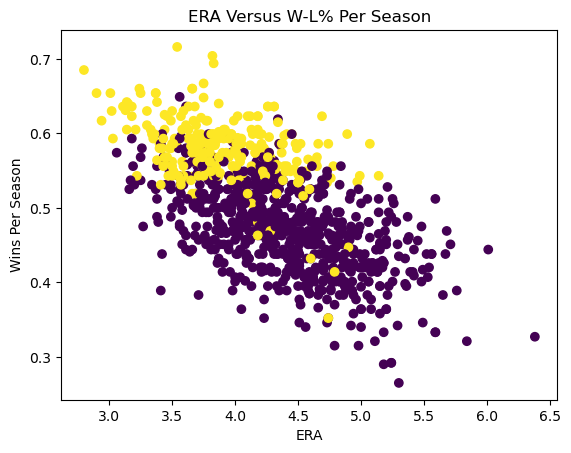

In [821]:
#Let's Find Some Significant Values by applying scater plots for different variables 
plt.scatter(df1["ERA"], df1["W-L%"], c=df1['PLAYOFFS'])
plt.xlabel("ERA")
plt.ylabel("Wins Per Season")
plt.title("ERA Versus W-L% Per Season")
plt.show()



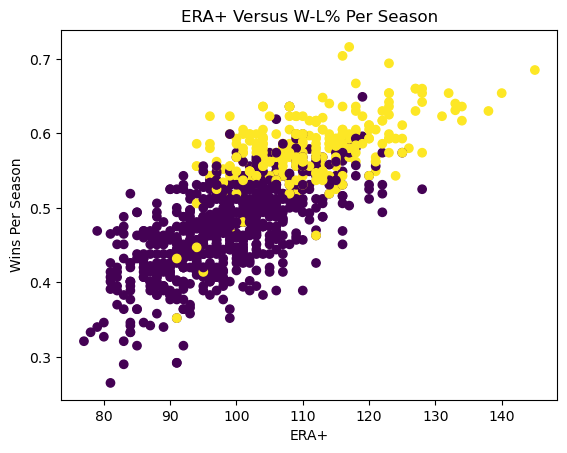

In [822]:
plt.scatter(df1["ERA_Plus"], df1["W-L%"], c=df1['PLAYOFFS'])
plt.xlabel("ERA+")
plt.ylabel("Wins Per Season")
plt.title("ERA+ Versus W-L% Per Season")
plt.show()

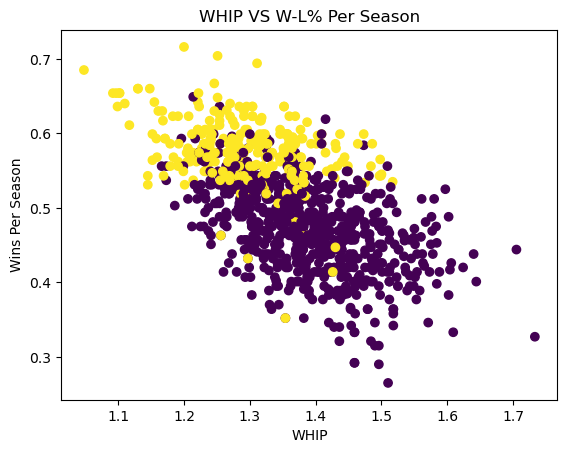

In [823]:
plt.scatter(df1["WHIP"], df1["W-L%"], c=df1['PLAYOFFS'])
plt.xlabel("WHIP")
plt.ylabel("Wins Per Season")
plt.title("WHIP VS W-L% Per Season")
plt.show()


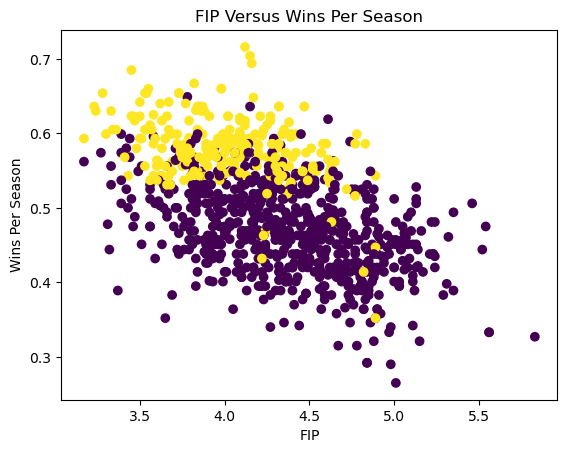

In [824]:
plt.scatter(df1["FIP"], df1["W-L%"], c=df1['PLAYOFFS'])
plt.xlabel("FIP")
plt.ylabel("Wins Per Season")
plt.title("FIP Versus Wins Per Season")
plt.show()


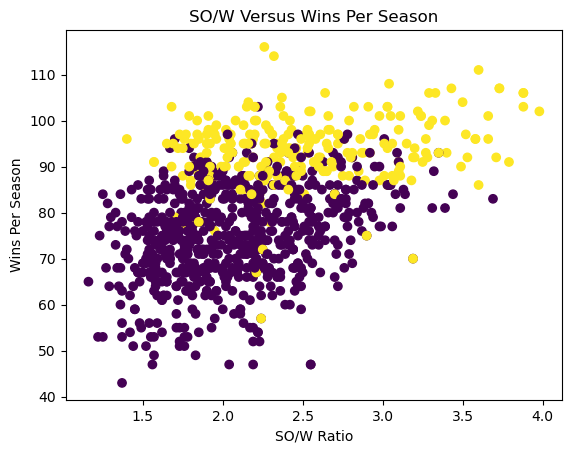

In [825]:
plt.scatter(df1["SO:W"], df1["W"], c=df1['PLAYOFFS'])
plt.xlabel("SO/W Ratio")
plt.ylabel("Wins Per Season")
plt.title("SO/W Versus Wins Per Season")
plt.show()


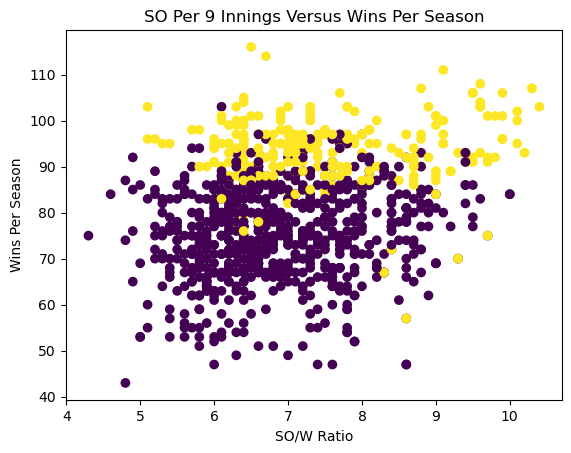

In [826]:
plt.scatter(df1["SO9"], df1["W"], c=df1['PLAYOFFS'])
plt.xlabel("SO/W Ratio")
plt.ylabel("Wins Per Season")
plt.title("SO Per 9 Innings Versus Wins Per Season")
plt.show()

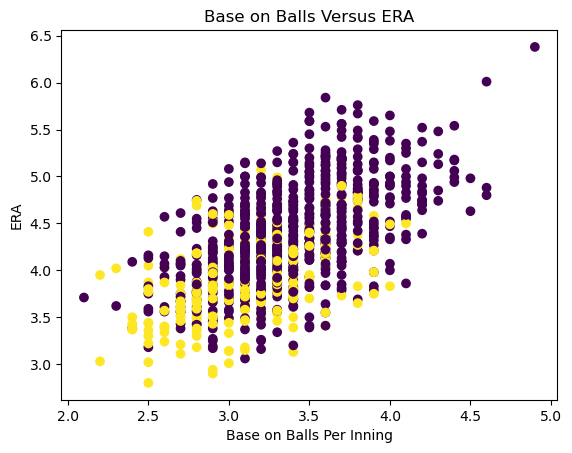

In [827]:
plt.scatter(df1["BB9"], df1["ERA"], c=df1['PLAYOFFS'])
plt.xlabel("Base on Balls Per Inning")
plt.ylabel("ERA")
plt.title("Base on Balls Versus ERA")
plt.show()

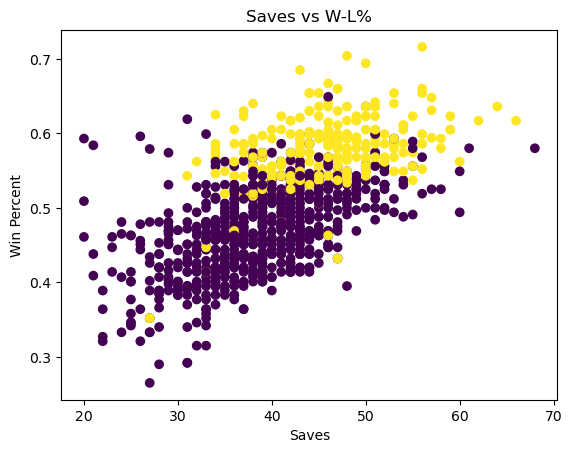

In [828]:
plt.scatter(df1["SV"], df1["W-L%"], c=df1['PLAYOFFS'])
plt.xlabel("Saves")
plt.ylabel("Win Percent")
plt.title("Saves vs W-L%")
plt.show()

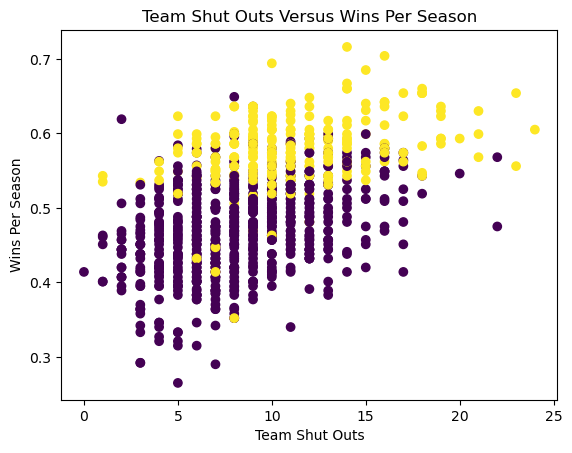

In [829]:
#'H9', 'HR9',

plt.scatter(df1["tSho"], df1["W-L%"], c=df1['PLAYOFFS'])
plt.xlabel("Team Shut Outs")
plt.ylabel("Wins Per Season")
plt.title("Team Shut Outs Versus Wins Per Season")
plt.show()

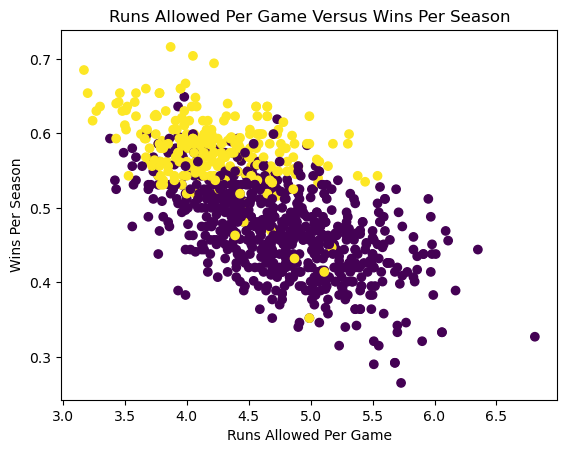

In [830]:
plt.scatter(df1["RA/G"], df1["W-L%"], c=df1['PLAYOFFS'])
plt.xlabel("Runs Allowed Per Game")
plt.ylabel("Wins Per Season")
plt.title("Runs Allowed Per Game Versus Wins Per Season")
plt.show()

In [831]:
#Apply Logistic Regression and/or GNB For the pitching dataset
#colums to save  "BB9", "SO9",'HR9'
inputs=df1[["ERA","RA/G","WHIP","SO:W","H9","FIP","SV","tSho","SO9","BB9"]]
target=df1["PLAYOFFS"]
# X_train, X_test, y_train,y_test=train_test_split(inputs,target,train_size=0.7)

LogReg=LogisticRegression(penalty='l2', solver='sag')
GNB=GaussianNB()
DT=DecisionTreeClassifier()

In [832]:
#Fit The Model To The Training Set
# model1=LogReg.fit(X_train,y_train)
# model2=GNB.fit(X_train,y_train)
# model3=DT.fit(X_train,y_train)

model1=LogReg.fit(inputs,target)
# model2=GNB.fit(inputs,target)
# model3=SVM.fit(inputs,target)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [833]:
#Predict The Model

# y_pred1=model1.predict(X_test)
# y_pred2=model2.predict(X_test)
# y_pred3=model3.predict(X_test)

# y_pred1=model1.predict(target)
# y_pred2=model2.predict(target)
# y_pred3=mdoel3.predict(target)


In [834]:
#Check The Accuracy of the model 
print("Logistic Regression Score: ", accuracy_score(y_pred1,y_test))
print("GNB Regression Score: ", accuracy_score(y_pred2,y_test))
print("Decision Tree Score: ", accuracy_score(y_pred3,y_test))





Logistic Regression Score:  0.8109965635738832
GNB Regression Score:  0.7731958762886598
Decision Tree Score:  0.7010309278350515


In [835]:
#Get the Summary for the model

In [836]:
#Test Our Model for The 2023 Pitching Dataset.
# First, let's describe the independent values in the 2023 dataset
# df2[["ERA","FIP","WHIP","SO/W", "SO9","HR9"]].groupby(df2["Tm"]).describe()

In [839]:
inputs2=df2[["ERA","RA/G","WHIP","SO/W","H9","FIP","SV","tSho","SO9","BB9"]]
target=df2["PLAYOFFS"]


In [840]:
# #Fit model1 to the datset
results=model1.predict(inputs2)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- SO/W
Feature names seen at fit time, yet now missing:
- SO:W

  warnings.warn(message, FutureWarning)


In [841]:
#Accuracy Score 
print(accuracy_score(results, target))

0.7333333333333333
